# SPARK CHALLENGE

#### Installing all required libraries

In [ ]:
'''
!pip install folium
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install geopandas
!pip install haversine
'''

#### Importing all required libraries

In [4]:
import os
import numpy as np
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import scipy as sp
from scipy.stats import pearsonr
import folium
import glob
import seaborn as sns
import unicodedata
import haversine as hs


#### Checkiing Korean font

In [5]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

font_path = fm.findfont('AppleGothic')

if not font_path:
    print('Warning: AppleGothic font not found')
else:
    print("AppleGothic font found at ", font_path)

font_prop = fm.FontProperties(fname=font_path, size=12)

AppleGothic font found at  /System/Library/Fonts/Supplemental/AppleGothic.ttf


#### Checking current directory

In [6]:
print(os.getcwd())

/Users/b05/Desktop/Competitions


#### Converting all paths into variables

In [7]:
# Creating variables for data paths

dataset = "./dataset/"
META = dataset + "META/"
TRAIN_AWS = dataset + "TRAIN_AWS/"
TRAIN_PM = dataset + "TRAIN/PM/"
TEST_AWS = dataset + "TEST_AWS/"
TEST_PM = dataset + "TEST_INPUT/"
ENG_TRAIN_AWS = dataset + "ENG_TRAIN/AWS/"
ENG_TRAIN_PM = dataset + "ENG_TRAIN/PM/"
ENG_TEST_AWS = dataset + "ENG_TEST/AWS/"
ENG_TEST_PM = dataset + "ENG_TEST/PM/"
AWS_CITY_VARIABLE = dataset + "ALL_CITY_VARIABLE/AWS_TRAIN_VARIABLE/"
PM_CITY_VARIABLE = dataset + "ALL_CITY_VARIABLE/PM_TRAIN_VARIABLE/"
AWS_CITY_YEAR = dataset + "CITY_YEAR/AWS_TRAIN_CITY_YEAR/"
PM_CITY_YEAR = dataset + "CITY_YEAR/PM_TRAIN_CITY_YEAR/"
LI_AWS = dataset + "Linear_Interpolate_Filled/Linear_TRAIN_AWS/"

#### Defining distances using Lat-Lng info

In [8]:
# Definition for getting distance between Point A, Point B

def obs_distance(df1, df2):
    rows = []
    for i in range(len(df1)):
        for j in range(len(df2)):
            if i != j:
                df1_loc = df1["Location"][i]
                df2_loc = df2["Location"][j]
                df1_lat = df1["Latitude"][i]
                df2_lat = df2["Latitude"][j]
                df1_lng = df1["Longitude"][i]
                df2_lng = df2["Longitude"][j]

                point_1 = (df1_lat, df1_lng)
                point_2 = (df2_lat, df2_lng)
                distance = hs.haversine(point_1, point_2)

                rows.append({"Location 0": df1_loc, "Location 1": df2_loc, "Distance": distance})
    df = pd.concat([pd.DataFrame(row, index=[0]) for row in rows], ignore_index=True)
    return df

## Dealing CSV Files

#### Reading all Train & Test CSV files.

In [9]:
# reading All Test & Train csv files.

file_locations = {
    'meta': META,
    'train_aws': TRAIN_AWS,
    'train_pm': TRAIN_PM,
    'test_aws': TEST_AWS,
    'test_pm': TEST_PM,
    "eng_train_aws" : ENG_TRAIN_AWS,
    "eng_train_pm" : ENG_TRAIN_PM,
    "eng_test_aws" : ENG_TEST_AWS,
    "eng_test_pm" : ENG_TRAIN_AWS

}

all_file_locations = {}
for key, value in file_locations.items():
    all_file_locations[key] = glob.glob(value + "*.csv")



'''
type all_file_locations["key"] to call
keys are "train_aws", "train_pm", "test_aws", "test_pm"
'''


'\ntype all_file_locations["key"] to call\nkeys are "train_aws", "train_pm", "test_aws", "test_pm"\n'

In [10]:
#### Create new folders to store all csv files generated during the program run..

In [11]:
# create new folders to store all csv files

if not os.path.exists(dataset + "CITY_YEAR"):
    os.mkdir(dataset + "CITY_YEAR")
if not os.path.exists(AWS_CITY_YEAR):
    os.mkdir(AWS_CITY_YEAR)
if not os.path.exists(PM_CITY_YEAR):
    os.mkdir(PM_CITY_YEAR)
if not os.path.exists(dataset + "ALL_CITY_VARIABLE"):
    os.mkdir(dataset + "ALL_CITY_VARIABLE")
if not os.path.exists(AWS_CITY_VARIABLE):
    os.mkdir(AWS_CITY_VARIABLE)
if not os.path.exists(PM_CITY_VARIABLE):
    os.mkdir(PM_CITY_VARIABLE)
if not os.path.exists(dataset + "ENG_TRAIN"):
    os.mkdir(dataset + "ENG_TRAIN")
if not os.path.exists(ENG_TRAIN_AWS):
    os.mkdir(ENG_TRAIN_AWS)
if not os.path.exists(ENG_TRAIN_PM):
    os.mkdir(ENG_TRAIN_PM)
if not os.path.exists(dataset + "ENG_TEST"):
    os.mkdir(dataset + "ENG_TEST")
if not os.path.exists(ENG_TEST_AWS):
    os.mkdir(ENG_TEST_AWS)
if not os.path.exists(ENG_TEST_PM):
    os.mkdir(ENG_TEST_PM)
if not os.path.exists(dataset + "Linear_Interpolate_Filled"):
    os.mkdir(dataset + "Linear_Interpolate_Filled")
if not os.path.exists(LI_AWS):
    os.mkdir(LI_AWS)
if not os.path.exists(dataset + "Distances"):
    os.mkdir(dataset + "Distances")

## Converting all column names into English
#### Preventing Encoding Error

In [24]:
# Converting all column names into English

for files in all_file_locations['train_aws']:
    train_aws_files = pd.read_csv(files)
    train_aws_files.rename(columns={"연도":"Year", "일시":"DateTime", "지점":"Observatory","기온(°C)":"Temperature", "풍향(deg)":"Wind_Direction", "풍속(m/s)":"Wind_Speed", "강수량(mm)":"Precipitation", "습도(%)":"Humidity"}, inplace=True)
    train_aws_files.to_csv(files, index=False)


for files in all_file_locations['test_aws']:
    test_aws_files = pd.read_csv(files)
    test_aws_files.rename(columns={"연도":"Year", "일시":"DateTime", "지점":"Observatory","기온(°C)":"Temperature", "풍향(deg)":"Wind_Direction", "풍속(m/s)":"Wind_Speed", "강수량(mm)":"Precipitation", "습도(%)":"Humidity"}, inplace=True)
    test_aws_files.to_csv(files, index=False)

for files in all_file_locations['train_pm']:
    train_pm_files = pd.read_csv(files)
    train_pm_files.rename(columns={"연도":"Year", "일시":"DateTime", "측정소":"Observatory"}, inplace=True)
    train_pm_files.to_csv(files, index=False)


for files in all_file_locations['test_pm']:
    test_pm_files = pd.read_csv(files)
    test_pm_files.rename(columns={"연도":"Year", "일시":"DateTime", "측정소":"Observatory"}, inplace=True)
    test_pm_files.to_csv(files, index=False)

## Printing out Map for our reference

#### Printing map of Chungcheong, the area of interest

In [13]:
map_Kor = folium.Map(location=(36.62, 126.984873), zoom_start = 9, tiles="Stamen Terrain")
map_Kor.save("Climate_Map.html")

#### Reading map data csv files.

In [14]:
awsmap_csv = pd.read_csv(META + "awsmap.csv")
pmmap_csv = pd.read_csv(META + "pmmap.csv")

#### Allocating each columns into list variable.

In [15]:
aws_loc = awsmap_csv["Location"]
aws_lat = awsmap_csv["Latitude"]
aws_lng = awsmap_csv["Longitude"]

pm_loc = pmmap_csv["Location"]
pm_lat = pmmap_csv["Latitude"]
pm_lng = pmmap_csv["Longitude"]

#### Normalizing Korean fonts

In [16]:
new = []
for i in aws_loc:
    new.append(unicodedata.normalize('NFC', i))
aws_loc.columns = new

new = []
for i in pm_loc:
    new.append(unicodedata.normalize('NFC', i))
pm_loc.columns = new

#### Printing out the location on map, using folium.

In [17]:
aws_num = 0
while aws_num < len(aws_loc):
    folium.Marker(location=[aws_lat[aws_num], aws_lng[aws_num]], popup=aws_loc[aws_num],
                  icon=folium.Icon(color="blue")).add_to(map_Kor)
    aws_num += 1

pm_num = 0
while pm_num < len(pm_loc):
    folium.Marker(location=[pm_lat[pm_num], pm_lng[pm_num]], popup=pm_loc[pm_num],
                  icon=folium.Icon(color="red")).add_to(map_Kor)
    pm_num += 1

### Save

In [18]:
map_Kor.save("Climate_Map.html")

## Map Done

#### Separate csv file by city and years

In [19]:
# selecting each files within the TRAIN_AWS folder

for train_aws_file in all_file_locations['eng_train_aws']:
    # read csv file
    df_aws = pd.read_csv(train_aws_file)
    # get location name from file name
    location = os.path.splitext(os.path.basename(train_aws_file))[0]
    # separate by year and save as separate csv files
    for year in range(4):
        year_df = df_aws[df_aws['Year'] == year]
        year_filename = AWS_CITY_YEAR + f"train_aws_{location}_{year}.csv"
        year_df.to_csv(year_filename, index=False)

for train_pm_file in all_file_locations['eng_train_pm']:
    df_pm = pd.read_csv(train_pm_file)
    location = os.path.splitext(os.path.basename(train_pm_file))[0]
    for year in range(4):
        year_df = df_pm[df_pm['Year'] == year]
        year_filename = PM_CITY_YEAR + f"train_pm_{location}_{year}.csv"
        year_df.to_csv(year_filename, index=False)

#### Createing new dataframe to store same columns per observatory

In [30]:
# Assigning numbers to each column
column_names = {
    "Temperature": 3,
    "Wind_Direction": 4,
    "Wind_Speed": 5,
    "Precipitation": 6,
    "Humidity": 7
}

In [31]:
# Separating columns per obervatory

# Select each keys and values from column_name dictionary.
for column_name, col_idx in column_names.items():
# Create a temporary list to append the data from teh for-loop below.
    temp_list = []
# Select each file in TRAIN_AWS folder
    for train_aws_file in all_file_locations['eng_train_aws']:
# Extract Observatory location from the file name.
        file_name = train_aws_file.split("/")[-1].split(".")[0].split("_")[0]
# Read CSV, but Read only column 0, column 1, and column to focus on
        df_cols_only = pd.read_csv(train_aws_file, usecols=[0, 1, col_idx])
# Append extracted columns to temp_list
        temp_list.append((file_name, df_cols_only))
# Concatenate DataFrame
    AWS_TRAIN_total = pd.concat([df_temp[1][column_name] for df_temp in temp_list], axis=1)
# set columns
    AWS_TRAIN_total.columns = [df_temp_new[0] for df_temp_new in temp_list]
# Insert "연도" and "일시" on column 0 and 1 respectively
    AWS_TRAIN_total.insert(loc=0, column='Year', value=temp_list[0][1]["Year"])
    AWS_TRAIN_total.insert(loc=1, column='DateTime', value=temp_list[0][1]["DateTime"])

# Export the DataFrame to CSV
    AWS_TRAIN_total.to_csv(AWS_CITY_VARIABLE + f"{column_name}.csv", index=False)

In [32]:
PM_TRAIN_total = pd.DataFrame()

for train_pm_file in all_file_locations['eng_train_pm']:
    df_train_pm = pd.read_csv(train_pm_file)
    column_name = train_pm_file.split("/")[-1].split(".")[0]
    column_data = df_train_pm.iloc[:, 3]
    column_data.name = column_name
    PM_TRAIN_total[column_name] = column_data

PM_TRAIN_total['Year'] = df_train_pm.iloc[:, 0]
PM_TRAIN_total['DateTime'] = df_train_pm.iloc[:, 1]
PM_TRAIN_total = PM_TRAIN_total.set_index(["Year", "DateTime"])

PM_TRAIN_total.to_csv(PM_CITY_VARIABLE + "PM2_5.csv", index=True)

#### Finding wind-direction correlation between cities.

In [33]:
# Read wind_direction csv file generated above.
rel_wind_dir = pd.read_csv(AWS_CITY_VARIABLE + "Wind_Direction.csv")
# Assign columns to list
locs_aws = list(rel_wind_dir.columns)

# Normalize Korean fonts.
new = []
for i in locs_aws:
    new.append(unicodedata.normalize('NFC', i))
rel_wind_dir.columns = new

# Print Wind Directions without "연도" and "일시"
rel_w_d = rel_wind_dir.iloc[:, 2:]

#### Calculate the correlations of wind direction; between each column

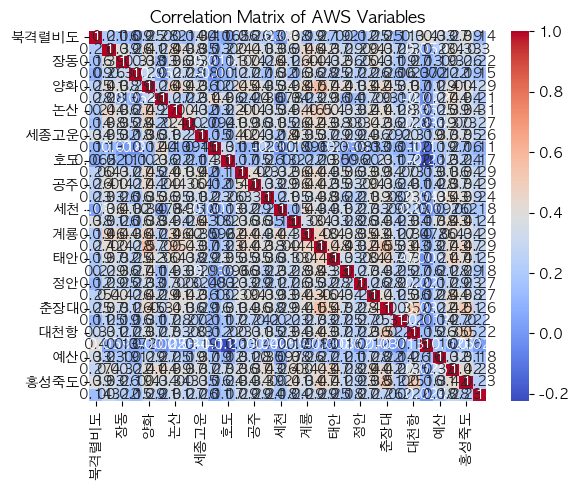

In [34]:
corr_matrix = rel_w_d.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of AWS Variables")
plt.show()

## Filling up missing values

## Using Linear Interpolarization Method for each columns

In [35]:
# read all csv files

AWS_paths = all_file_locations["eng_train_aws"]

# 1. Linear Interpolation

for train_aws_file in all_file_locations['eng_train_aws']:
    train_aws_file = unicodedata.normalize('NFC', train_aws_file)

# Selecting each files within the TRAIN_AWS folder.
for train_aws_file in all_file_locations['eng_train_aws']:
    train_aws_file = unicodedata.normalize('NFC', train_aws_file)

# Selecting each files within the TRAIN_AWS folder.
for train_aws_file in all_file_locations['eng_train_aws']:
    # Read each file.
    data = pd.read_csv(train_aws_file)
    # Added one more line of code to get the location name for future usage.
    location_name = train_aws_file.split("/")[-1].split(".")[0]
    '''
    Dead Codes (No Longer Used, Keeping it for future reference.)
    # Splitting DateTime into separate columns of Date and Time.
    data[["Date", "Time"]] = data["DateTime"].str.split(" ", expand=True)
    # Convert time into Date_Range
    date_range = list(data["Time"][0:])
    '''
    # Interpolate the data and replace the old columns.
    for columns_each in data[data.columns[3:8]]:
        data[columns_each] = data[columns_each].interpolate()
    # Export the data in .csv format to a new designated folder.
    data.to_csv(LI_AWS + f"{location_name}_filled.csv", index=True)


In [36]:
# Getting distances between each observatory

aws_distance = obs_distance(awsmap_csv, awsmap_csv)
aws_distance.to_csv(dataset + "Distances/aws_distance.csv")

aws_pm_distance = obs_distance(awsmap_csv, pmmap_csv)
aws_pm_distance.to_csv(dataset + "Distances/aws_pm_distance.csv")

pm_distance = obs_distance(pmmap_csv, pmmap_csv)
pm_distance.to_csv(dataset + "Distances/pm_distance.csv")

In [37]:
# Printing out descriptions for the data I have.

print("aws_distance : \n", aws_distance.describe(), "\n")
print("aws_pm_distance : \n", aws_pm_distance.describe(), "\n")
print("pm_distance : \n", pm_distance.describe(), "\n")

aws_distance : 
          Distance
count  870.000000
mean    62.902403
std     32.858147
min      5.299733
25%     37.414905
50%     58.627383
75%     82.730279
max    175.816043 

aws_pm_distance : 
          Distance
count  493.000000
mean    58.661063
std     32.521786
min      2.210595
25%     33.111928
50%     55.958014
75%     78.843231
max    171.413338 

pm_distance : 
          Distance
count  272.000000
mean    53.645499
std     28.380919
min      6.393905
25%     31.476327
50%     53.589891
75%     69.835582
max    120.206075 



In [ ]:
# Using 25% as a range.

rows = []
for i in range(len(aws_distance)):
    if aws_distance["Distance"][i] <= np.percentile(aws_distance["Distance"], 25):
        rows.append({"Location 0":aws_distance["Location 0"][i], "Location 1":aws_distance["Location 1"][i], "Distance":aws_distance["Distance"][i]})
    else:
        continue


df = pd.concat([pd.DataFrame(row, index=[0]) for row in rows], ignore_index=True)
print(df)

rows = []
for i in range(len(aws_pm_distance)):
    if aws_distance["Distance"][i] <= np.percentile(aws_distance["Distance"], 25):
        rows.append({"Location 0":aws_distance["Location 0"][i], "Location 1":aws_distance["Location 1"][i], "Distance":aws_distance["Distance"][i]})
    else:
        continue


df = pd.concat([pd.DataFrame(row, index=[0]) for row in rows], ignore_index=True)
print(df)

rows = []
for i in range(len(pm_distance)):
    if aws_distance["Distance"][i] <= np.percentile(aws_distance["Distance"], 25):
        rows.append({"Location 0":aws_distance["Location 0"][i], "Location 1":aws_distance["Location 1"][i], "Distance":aws_distance["Distance"][i]})
    else:
        continue


df = pd.concat([pd.DataFrame(row, index=[0]) for row in rows], ignore_index=True)
print(df)
